<a href="https://colab.research.google.com/github/kharyal/machine-learning/blob/master/CIFAR10_VGGNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

(50000, 32, 32, 3)


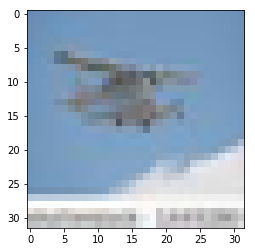

In [97]:
print(trainset.data.shape) # 50,000 images of 32*32*3 dimensions
plt.imshow(trainset.data[129])

In [98]:
batch_size=64
trainset=dsets.CIFAR10(root='./data',train=True,
                       transform=transforms.ToTensor(),
                       download=True)
testset=dsets.CIFAR10(root='./data',
                      train=False,
                     transform=transforms.ToTensor())
train_batch=torch.utils.data.DataLoader(dataset=trainset,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=2)
test_batch=torch.utils.data.DataLoader(dataset=testset,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')




0it [00:00, ?it/s]


  0%|          | 0/170498071 [00:00<?, ?it/s]




  0%|          | 450560/170498071 [00:00<00:43, 3946162.41it/s]


  2%|▏         | 4104192/170498071 [00:00<00:30, 5387766.32it/s]


  6%|▌         | 9904128/170498071 [00:00<00:21, 7401983.18it/s]


  8%|▊         | 14401536/170498071 [00:00<00:15, 9877539.78it/s]


 11%|█         | 18587648/170498071 [00:00<00:11, 12788299.66it/s]


 13%|█▎        | 22601728/170498071 [00:00<00:09, 16073492.69it/s]


 16%|█▌        | 26705920/170498071 [00:00<00:07, 19661867.57it/s]


 18%|█▊        | 30679040/170498071 [00:00<00:06, 23158712.49it/s]


 20%|██        | 34840576/170498071 [00:01<00:05, 26704136.96it/s]


 23%|██▎       | 38764544/170498071 [00:01<00:04, 29171713.54it/s]


 25%|██▍       | 42622976/170498071 [00:01<00:05, 24357254.21it/s]


 27%|██▋       | 45858816/170498071 [00:01<00:06, 18950994.53it/s]


 28%|██▊       | 48496640/170498071 [00:01<00:08, 13945411.65it/s]


 30%|██▉       | 50601984/170498071 [00:02<00:10, 11603238.71it/s]


 31%|███       | 52330496/170498071 [00

In [0]:
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
#     self.pad1=nn.ZeroPad2d()
    self.conv1=nn.Conv2d(3,16,3,stride=1,padding=1)
    self.conv2=nn.Conv2d(16,16,3,stride=1,padding=1)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv3=nn.Conv2d(16,32,3,stride=1,padding=1)
    self.conv4=nn.Conv2d(32,32,3,stride=1,padding=1)    
    self.pool2=nn.MaxPool2d(2,2)
    self.conv5=nn.Conv2d(32,64,3,stride=1,padding=1)    
    self.conv6=nn.Conv2d(64,64,3,stride=1,padding=1)
    self.pool3=nn.MaxPool2d(2,2)
    self.conv7=nn.Conv2d(64,128,3,stride=1,padding=1)    
    self.conv8=nn.Conv2d(128,128,3,stride=1,padding=1)
    self.conv9=nn.Conv2d(128,256,3,stride=1,padding=1)    
    self.pool4=nn.MaxPool2d(2,2)
    self.conv10=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv11=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.fc1=nn.Linear(1024,1024)
    self.fc2=nn.Linear(1024,1024)
    self.fc3=nn.Linear(1024,10)
    
  
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.relu(self.conv2(x))
    x=self.pool1(x)
    x=F.relu(self.conv3(x))
    x=F.relu(self.conv4(x))
    x=self.pool2(x)
    x=F.relu(self.conv5(x))
    x=F.relu(self.conv6(x))
    x=self.pool3(x)
    x=F.relu(self.conv7(x))
    x=F.relu(self.conv8(x))
    x=F.relu(self.conv9(x))
    x=self.pool4(x)
    x=F.relu(self.conv10(x))
    x=F.relu(self.conv11(x))
    x=x.view(-1,x.size(1) * x.size(2) * x.size(3))
#     print(x.shape)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [0]:
network=net()
if torch.cuda.is_available():
  network.cuda()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.0001)

In [103]:
for epoch in range(15):
  lossTotal=0
  for i, (images, labels) in enumerate(train_batch):
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    
    optimizer.zero_grad()
    op=network(images)
    loss=loss_function(op,labels)
    loss.backward()
    lossTotal=lossTotal+loss.item()
    optimizer.step()
    if i%100 ==0:
      print("local loss: ",loss.item())
  print("######## end of EPOCH: ",epoch+1," LOSS: ",lossTotal," ########")

local loss:  0.8763481378555298
local loss:  1.1448818445205688
local loss:  1.2348501682281494
local loss:  0.9553322792053223
local loss:  1.0246235132217407
local loss:  1.0500198602676392
local loss:  0.9376899003982544
local loss:  0.7915117740631104
######## end of EPOCH:  1  LOSS:  732.5455040931702  ########
local loss:  1.1798676252365112
local loss:  1.086159348487854
local loss:  0.6877957582473755
local loss:  1.082105278968811
local loss:  0.822853147983551
local loss:  0.8828607201576233
local loss:  0.7356221079826355
local loss:  0.7598463296890259
######## end of EPOCH:  2  LOSS:  708.62814027071  ########
local loss:  0.970159649848938
local loss:  1.0688846111297607
local loss:  0.9375836849212646
local loss:  1.074414610862732
local loss:  0.6960082054138184
local loss:  0.9551069140434265
local loss:  0.7595084309577942
local loss:  0.6617543697357178
######## end of EPOCH:  3  LOSS:  682.6192557811737  ########
local loss:  0.8959805965423584
local loss:  1.022674

In [104]:
correct=0
total=0
for images,labels in test_batch:
  images=Variable(images).cuda()
  labels=Variable(labels).cuda()
  
  output = network(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)
print("accuracy: ",(100*correct)/(total+1))

accuracy:  tensor(66, device='cuda:0')
